In [1]:
#init
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import accuracy_score

In [3]:
#data
good_data=pd.read_csv('good_url.csv',names=['url'])
good_data['label']=0
data=good_data

In [4]:
##feature
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer="char", sublinear_tf=True, ngram_range=(1,3)) #converting data to vectors
X = vectorizer.fit_transform(data['url'].values.astype('U'))
X_train, X_test, y_train, y_test = train_test_split(X, data['label'].values, test_size=0.2, random_state=42) #splitting data

In [5]:
#trainning
clf=IsolationForest()
clf.fit(X_train)
y_pre = clf.predict(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [6]:
#confusion_matrix
ny_pre = np.asarray(y_pre)
ny_pre[ny_pre==1] = 0
ny_pre[ny_pre==-1] = 1

ny_test = np.asarray(y_test)

class_names = ['normal','dangours']
cnf_matrix = confusion_matrix(ny_test, ny_pre) 
print(cnf_matrix)

[[233106  25801]
 [     0      0]]


Confusion matrix, without normalization
[[233106  25801]
 [     0      0]]
Normalized confusion matrix
[[0.9 0.1]
 [nan nan]]


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


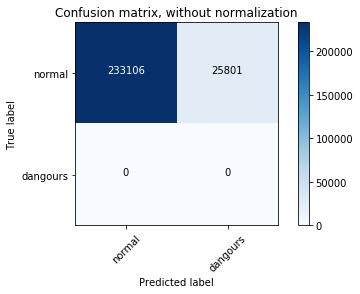

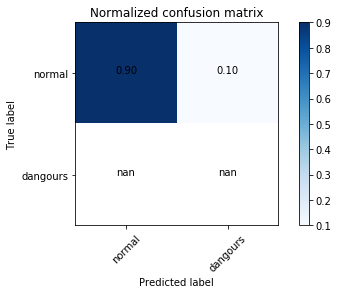

In [7]:
#visualization
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                           normalize=False,
                           title='Confusion matrix',
                           cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
np.set_printoptions(precision=2)                                        
                                       
# Plot non-normalized confusion matrix                            
plt.figure()                                                        
plot_confusion_matrix(cnf_matrix, classes=class_names,                  
                      title='Confusion matrix, without normalization')  
                                                                        
# Plot normalized confusion matrix
plt.figure()                                
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,  
                      title='Normalized confusion matrix')              
                                     
plt.show()

In [9]:
#tesing
bad_data=pd.read_csv('bad_url.csv',names=['url'])
bad_data['label']=0
data=bad_data
X = vectorizer.transform(data['url'].values.astype('U'))
y_pre = clf.predict(X)
y_test=bad_data['label'].values
ny_pre = np.asarray(y_pre)
ny_pre[ny_pre==1] = 0
ny_pre[ny_pre==-1] = 1
ny_test = np.asarray(y_test)
accuracy_score(ny_test,ny_pre)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


0.6950606770278901